# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
!pip install livelossplot
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.metrics import mean_squared_error
from keras import initializers
from keras import optimizers
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [2]:
# Import dataset
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [0]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [6]:
from sklearn.preprocessing import StandardScaler
# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)
xTrain_n = scaler.transform(xTrain)
xTest_n = scaler.transform(xTest)

xTrain_n = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTrain_n.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
429,-0.041830,-0.689952,-0.975168,-1.387862,1.098944,0.270702,-1.128152
42,-0.041830,-0.360777,-0.975168,-0.882817,-1.064332,-0.623031,0.886405
219,0.667148,0.462163,0.775582,-0.377773,0.017306,0.651365,0.886405
148,0.844393,1.120514,-0.099793,-0.377773,-0.523513,0.883074,0.886405
13,1.021637,0.791338,0.775582,0.632315,1.098944,0.866523,0.886405


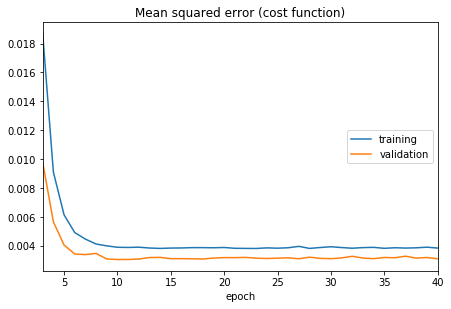

Mean squared error (cost function):
training   (min:    0.004, max:    0.378, cur:    0.004)
validation (min:    0.003, max:    0.118, cur:    0.003)


In [12]:
K.clear_session()
dims = 7
output_var=1
learning_rate=0.01
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(64, input_shape=(dims,)))
model.add(Dense(128, input_shape=(dims,)))
model.add(Dense(output_var))
op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(xTrain_n, yTrain,
          verbose=1, 
          epochs=40, 
          validation_data=[xTest_n,yTest],
          callbacks=[PlotLossesKeras()])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [9]:
y_pred = model.predict(xTest_n)
mean_squared_error(yTest, y_pred)

0.003124035147385635

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

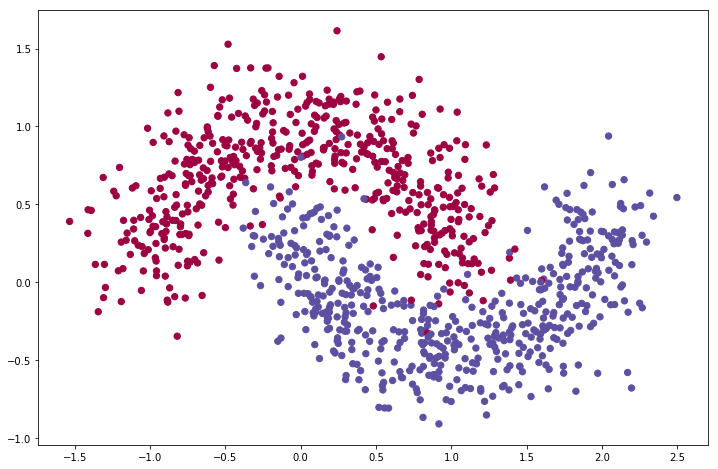

In [14]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral)

In [0]:
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x_train, y_train,test_size=0.25, random_state=22)

In [16]:
x_Train_t = x_Train.T
x_Train_t.shape

(2, 750)

In [17]:
y_Train_t = np.array(y_Train, ndmin=2)
y_Train_t.shape

(1, 750)

In [18]:
x_Test_t = x_Test.T
x_Test_t.shape

(2, 250)

In [19]:
y_Test_t = np.array(y_Test, ndmin=2)
y_Test_t.shape

(1, 250)

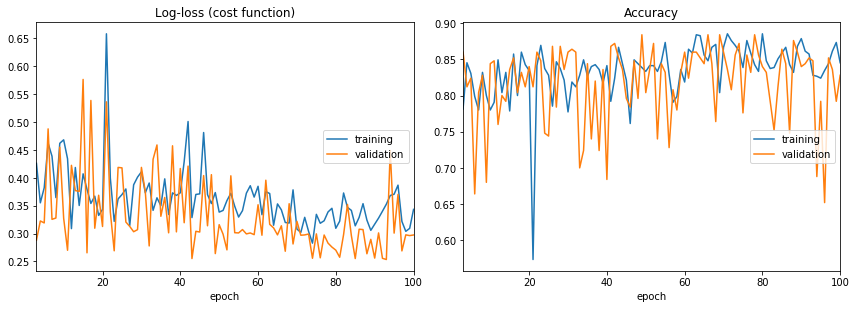

Log-loss (cost function):
training   (min:    0.283, max:    1.081, cur:    0.343)
validation (min:    0.253, max:    0.696, cur:    0.297)

Accuracy:
training   (min:    0.485, max:    0.885, cur:    0.845)
validation (min:    0.624, max:    0.884, cur:    0.828)


In [26]:
K.clear_session()
dims = 2
output_var=1
learning_rate=0.005
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))
model.add(Dense(128, input_shape=(dims,)))
model.add(Dense(128, input_shape=(dims,)))
model.add(Dense(64, input_shape=(dims,)))
model.add(Dense(output_var))
          
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'rmsprop')


model.fit(x_Train, y_Train,
          verbose=1, 
          epochs=100, 
          validation_data=[x_Test,y_Test],
          callbacks=[PlotLossesKeras()])

**Hint:** Use the next function to plt the decision boundary,

Text(0.5, 0, 'x1')

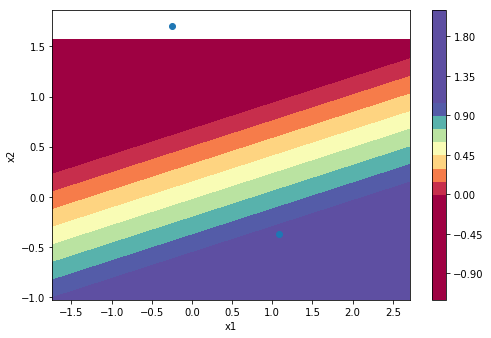

In [40]:

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    
    
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
            
    
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.Spectral, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.scatter(X[0, :], X[1, :], c=y.ravel(), s=80, cmap=plt.cm.Spectral)
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_Train, pred_fun)
plt.scatter(x_Train[0, :], x_Train[1, :])#, c = y_Train.ravel())
plt.ylabel('x2')
plt.xlabel('x1')
#plot_data(x_Train, y_Train)